# 01: Some Initial Plots

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

## Load data From 00-* pickles

In [2]:
!ls pickles/00-*

prefix = "00"

olympics = pd.read_pickle(f'pickles/{prefix}-olympics.pkl')
blue_girl = pd.read_pickle(f'pickles/{prefix}-bluegirl.pkl')
free_land = pd.read_pickle(f'pickles/{prefix}-free_land.pkl')
question_parliament = pd.read_pickle(f'pickles/{prefix}-question_parliament.pkl')
derby = pd.read_pickle(f'pickles/{prefix}-derby.pkl')
un_speech = pd.read_pickle(f'pickles/{prefix}-un_speech.pkl')
bimar = pd.read_pickle(f'pickles/{prefix}-bimar.pkl')

col1 = pd.read_pickle(f'pickles/{prefix}-col1.pkl')

pickles/00-bimar.pkl	 pickles/00-free_land.pkl
pickles/00-bluegirl.pkl  pickles/00-olympics.pkl
pickles/00-col1.pkl	 pickles/00-question_parliament.pkl
pickles/00-derby.pkl	 pickles/00-un_speech.pkl


## Most talketive Accounts

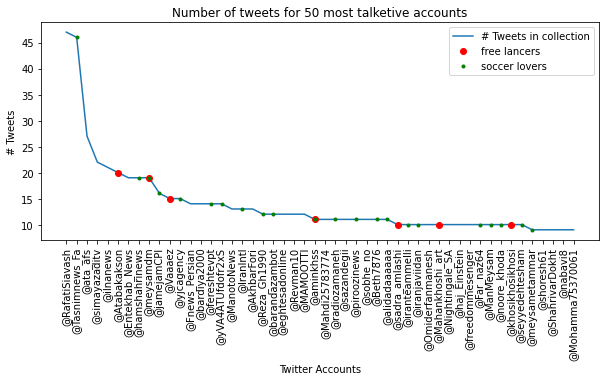

In [3]:
_ = col1.groupby('Screen Name').count()['Tweet ID'] \
    .reset_index(name='count') \
    .sort_values(['count'], ascending=False) \
    .head(50)

is_free_lancer = _['Screen Name'].isin(col1[col1['free lancer']==True]['Screen Name'].unique())
is_soccer_lover = _['Screen Name'].isin(col1[col1['soccer lover']==True]['Screen Name'].unique())

plt.figure(figsize=(10, 4))
plt.plot(_['Screen Name'], _['count'], label="# Tweets in collection")
plt.plot(_[is_free_lancer]['Screen Name'], _[is_free_lancer]['count'], 'ro', label='free lancers')
plt.plot(_[is_soccer_lover]['Screen Name'], _[is_soccer_lover]['count'], 'g.', label='soccer lovers')
plt.xticks(rotation=90)
plt.xlabel('Twitter Accounts')
plt.ylabel('# Tweets')
plt.legend()
plt.title('Number of tweets for 50 most talketive accounts');

## Most followed persons

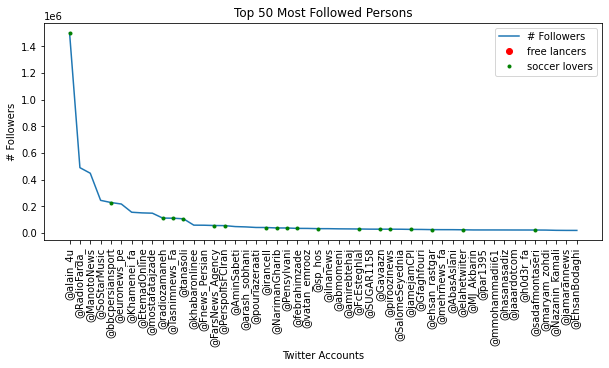

In [23]:
most_followed_persons = col1.groupby('Screen Name').max('Followers').sort_values('Followers', ascending=False).reset_index().head(50)
is_free_lancer = most_followed_persons['Screen Name'].isin(col1[col1['free lancer']==True]['Screen Name'].unique())
is_soccer_lover = most_followed_persons['Screen Name'].isin(col1[col1['soccer lover']==True]['Screen Name'].unique())

plt.figure(figsize=(10, 4))
plt.plot(most_followed_persons['Screen Name'], most_followed_persons['Followers'], label="# Followers")
plt.plot(most_followed_persons[is_free_lancer]['Screen Name'], most_followed_persons[is_free_lancer]['Followers'], 'ro', label='free lancers')
plt.plot(most_followed_persons[is_soccer_lover]['Screen Name'], most_followed_persons[is_soccer_lover]['Followers'], 'g.', label='soccer lovers')
plt.xticks(rotation=90)
plt.xlabel('Twitter Accounts')
plt.ylabel('# Followers')
plt.legend()
plt.title('Top 50 Most Followed Persons');